In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.read_excel("archivo.xlsx")


FileNotFoundError: [Errno 2] No such file or directory: 'archivo.xlsx'

In [4]:
df = pd.read_excel("medicion_ruido_ibague_20230118_a_20230124")

FileNotFoundError: [Errno 2] No such file or directory: 'medicion_ruido_ibague_20230118_a_20230124'

In [5]:
df = pd.read_csv("medicion_ruido_ibague_20230118_a_20230124.csv", sep=";")


FileNotFoundError: [Errno 2] No such file or directory: 'medicion_ruido_ibague_20230118_a_20230124.csv'

In [6]:
import os
os.listdir()


['.config', 'medicion_ruido_ibague_20230118_a_20230124.csv', 'sample_data']

In [7]:
import pandas as pd

df = pd.read_csv(
    "medicion_ruido_ibague_20230118_a_20230124.csv",
    sep=";",
    encoding="latin1"
)


In [8]:
df.head()


,Fecha,Ruido (dB)
0,20/01/2023 23:05,"42,0"
1,24/01/2023 10:51,41.0
2,22/01/2023 19:56,"42,0"
3,24/01/2023 11:37,"41,0"
4,23/01/2023 13:37,41.0


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10792 entries, 0 to 10791
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Fecha       10792 non-null  object
 1   Ruido (dB)  10792 non-null  object
dtypes: object(2)
memory usage: 168.8+ KB


In [10]:
# Convertir fecha a formato fecha real
df["Fecha"] = pd.to_datetime(
    df["Fecha"],
    dayfirst=True,
    errors="coerce"
)

# Cambiar coma por punto en ruido
df["Ruido (dB)"] = df["Ruido (dB)"].str.replace(",", ".")

# Convertir ruido a número
df["Ruido (dB)"] = df["Ruido (dB)"].astype(float)


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10792 entries, 0 to 10791
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Fecha       7213 non-null   datetime64[ns]
 1   Ruido (dB)  10792 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 168.8 KB


In [12]:
df = df.sort_values("Fecha")


In [13]:
duplicados = df.duplicated().sum()

print("Duplicados:", duplicados)


Duplicados: 4259


In [14]:
df = df.drop_duplicates()


In [15]:
print("Promedio:", df["Ruido (dB)"].mean())
print("Mínimo:", df["Ruido (dB)"].min())
print("Máximo:", df["Ruido (dB)"].max())
print("Mediana:", df["Ruido (dB)"].median())
print("Moda:", df["Ruido (dB)"].mode()[0])


Promedio: 43.42508801469462
Mínimo: -15.2
Máximo: 200.3
Mediana: 42.0
Moda: 42.0


In [16]:
# Eliminar valores imposibles de ruido
df = df[
    (df["Ruido (dB)"] >= 0) &
    (df["Ruido (dB)"] <= 120)
]


In [17]:
print("Promedio:", df["Ruido (dB)"].mean())
print("Mínimo:", df["Ruido (dB)"].min())
print("Máximo:", df["Ruido (dB)"].max())
print("Mediana:", df["Ruido (dB)"].median())
print("Moda:", df["Ruido (dB)"].mode()[0])


Promedio: 41.60245597026983
Mínimo: 0.0
Máximo: 107.0
Mediana: 42.0
Moda: 42.0


## Estadísticas descriptivas

Luego del proceso de limpieza de datos, se obtuvo un nivel promedio de ruido de 41.6 dB.
El valor mínimo fue de 0 dB y el máximo de 107 dB.
La mediana y la moda fueron de 42 dB, lo que indica una alta concentración de mediciones alrededor de este valor.
Estos resultados representan un comportamiento coherente del ruido ambiental urbano.


In [18]:
# Crear columnas de día y hora
df["Dia"] = df["Fecha"].dt.date
df["Hora"] = df["Fecha"].dt.hour


In [19]:
# Promedio por día
por_dia = df.groupby("Dia")["Ruido (dB)"].mean()

por_dia


,Ruido (dB)
Dia,
2023-01-18,41.381873
2023-01-19,41.877263
2023-01-20,41.857748
2023-01-21,41.443665
2023-01-22,41.932100
2023-01-23,41.572886
2023-01-24,41.326379


El día con mayor nivel promedio de ruido fue el 22 de enero de 2023, con un valor aproximado de 41.93 dB.


In [20]:
por_hora = df.groupby("Hora")["Ruido (dB)"].mean()

por_hora


,Ruido (dB)
Hora,
0.0,42.408502
1.0,41.561943
2.0,42.492623
3.0,42.556000
4.0,42.084112
5.0,41.352381
6.0,42.651913
7.0,40.809605
8.0,41.190840


El análisis por hora muestra que el mayor nivel promedio de ruido se presentó a las 6:00 a.m., con aproximadamente 42.65 dB.
Esto puede estar relacionado con el inicio de actividades laborales y el aumento del tráfico vehicular.


In [21]:
# Eventos con ruido alto (mayor a 90 dB)
ruido_extremo = df[df["Ruido (dB)"] > 90]

ruido_extremo


,Fecha,Ruido (dB),Dia,Hora
3518,2023-01-22 21:41:00,107.0,2023-01-22,21.0


In [22]:
len(ruido_extremo)


1

Se identificó un único evento extremo de ruido mayor a 90 dB, ocurrido el 22 de enero de 2023 a las 21:41 horas, con un valor aproximado de 107 dB.
Este evento puede estar asociado a una situación puntual como tráfico pesado, emergencia o actividad excepcional.


In [25]:
desviacion = df["Ruido (dB)"].std()

print("Desviación estándar:", desviacion)


Desviación estándar: 5.292214199741907


La desviación estándar del nivel de ruido fue de 5.29 dB, lo cual indica una variabilidad moderada en las mediciones.
Esto sugiere que, aunque el ruido promedio se mantiene estable, existen algunos eventos puntuales que generan variaciones.


In [26]:
resumen = df["Ruido (dB)"].describe()

resumen


,Ruido (dB)
count,6189.000000
mean,41.602456
std,5.292214
min,0.000000
25%,42.000000
50%,42.000000
75%,43.000000
max,107.000000


## Conclusiones

A partir del análisis exploratorio de los datos de ruido ambiental en Ibagué, se evidenció que los niveles se concentran principalmente alrededor de los 42 dB, lo cual representa un entorno relativamente estable.

Se identificaron variaciones a lo largo del día y entre fechas, siendo el 22 de enero el día con mayor nivel promedio de ruido y las 6:00 a.m. la hora más ruidosa.

Asimismo, se detectó un evento extremo con valores superiores a 90 dB, lo cual corresponde a una situación puntual.

La desviación estándar indica una variabilidad moderada, lo que confirma la estabilidad general del comportamiento del ruido con algunos picos aislados.

En general, el análisis permitió caracterizar adecuadamente el comportamiento del ruido ambiental durante el período estudiado.


In [27]:
min_val = df["Ruido (dB)"].min()
max_val = df["Ruido (dB)"].max()

min_fila = df[df["Ruido (dB)"] == min_val]
max_fila = df[df["Ruido (dB)"] == max_val]

min_fila, max_fila


(                    Fecha  Ruido (dB)         Dia  Hora
 776   2023-01-18 01:10:00         0.0  2023-01-18   1.0
 605   2023-01-18 01:51:00         0.0  2023-01-18   1.0
 83    2023-01-18 05:04:00         0.0  2023-01-18   5.0
 872   2023-01-18 05:16:00         0.0  2023-01-18   5.0
 781   2023-01-18 05:37:00         0.0  2023-01-18   5.0
 ...                   ...         ...         ...   ...
 4518  2023-01-24 17:47:00         0.0  2023-01-24  17.0
 10332 2023-01-24 18:40:00         0.0  2023-01-24  18.0
 5681  2023-01-24 19:25:00         0.0  2023-01-24  19.0
 6925  2023-01-24 21:59:00         0.0  2023-01-24  21.0
 51                    NaT         0.0         NaT   NaN
 
 [63 rows x 4 columns],
                    Fecha  Ruido (dB)         Dia  Hora
 3518 2023-01-22 21:41:00       107.0  2023-01-22  21.0)

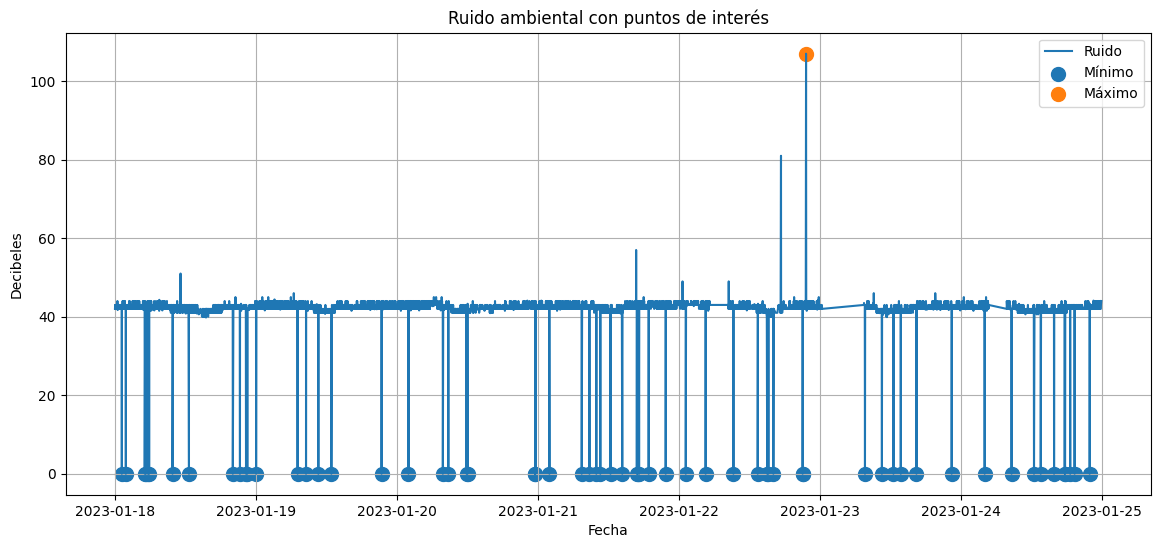

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))

# Línea principal
plt.plot(df["Fecha"], df["Ruido (dB)"], label="Ruido")

# Punto mínimo
plt.scatter(
    min_fila["Fecha"],
    min_fila["Ruido (dB)"],
    s=100,
    label="Mínimo"
)

# Punto máximo
plt.scatter(
    max_fila["Fecha"],
    max_fila["Ruido (dB)"],
    s=100,
    label="Máximo"
)

plt.title("Ruido ambiental con puntos de interés")
plt.xlabel("Fecha")
plt.ylabel("Decibeles")
plt.legend()
plt.grid(True)

plt.show()


La gráfica muestra el comportamiento temporal del ruido ambiental, destacando claramente los valores mínimo y máximo registrados.
Se observa una tendencia estable alrededor de los 42 dB, con un evento extremo que alcanza los 107 dB, correspondiente a una situación puntual.
Esta visualización permite identificar fácilmente los principales puntos de interés del conjunto de datos.
